In [1]:
import geoplot as gplt 
import geoplot.crs as gcrs
import geopandas as gpd
gpd.__version__
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
from fiona.crs import from_epsg
import mapclassify as mc
import glob

#해안선 받아놓기

coastline= gpd.read_file('./Coastlinse_khoa/Coastlinse_khoa.shp', encoding='utf8')
#5179로변환  

coastline= coastline.to_crs(epsg=4326)

In [11]:
#맵 그리기 함수선언
def plot_map(data):
    ax = data.plot(figsize=(50, 30),facecolor='yellow', edgecolor='black',linewidth=0.5, zorder=2)
    coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=1,linewidth=0.5)
    plt.grid(True, alpha=0.5, linestyle='--')
    
def plot_colormap(data, column, interval, data2=None, data3=None, figsize = [50,30]):
    if data2 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=True)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    elif data3 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=True)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    else:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=True)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        data3.plot(ax = ax, facecolor='red', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')


In [17]:
UNDER_SEA = gpd.read_file('./Ex/220105/해저지형(1min)_유효값.shp', encoding='utf8')

In [12]:
flist = glob.glob('./Ex/20220413/**/*.shp', recursive=True)
for fname in flist:
    print(fname.split('\\')[-1])
# flist

수치모델 예측자료-수온.shp


In [20]:
info = pd.read_csv('./Ex/20220413/어업정보통신국.csv', encoding='euckr')
info

,지역,경도,위도
0,인천,126.603353,37.457838
1,태안,126.135788,36.675290
2,군산,126.700823,35.991577
3,목포,126.410948,34.800949
4,제주,126.532628,33.517746
5,여수,127.728360,34.730616
6,삼천포,128.068415,34.926701
7,통영,128.431923,34.841666
8,부산,129.034537,35.089065
9,울산,129.430898,35.483211


In [24]:
info_geom = gpd.points_from_xy(info.경도, info.위도)

C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [25]:
info_shp = gpd.GeoDataFrame(info, geometry=info_geom, crs=from_epsg(4326))
info_shp

C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,지역,경도,위도,geometry
0,인천,126.603353,37.457838,POINT (126.60335 37.45784)
1,태안,126.135788,36.675290,POINT (126.13579 36.67529)
2,군산,126.700823,35.991577,POINT (126.70082 35.99158)
3,목포,126.410948,34.800949,POINT (126.41095 34.80095)
4,제주,126.532628,33.517746,POINT (126.53263 33.51775)
5,여수,127.728360,34.730616,POINT (127.72836 34.73062)
6,삼천포,128.068415,34.926701,POINT (128.06841 34.92670)
7,통영,128.431923,34.841666,POINT (128.43192 34.84167)
8,부산,129.034537,35.089065,POINT (129.03454 35.08906)
9,울산,129.430898,35.483211,POINT (129.43090 35.48321)


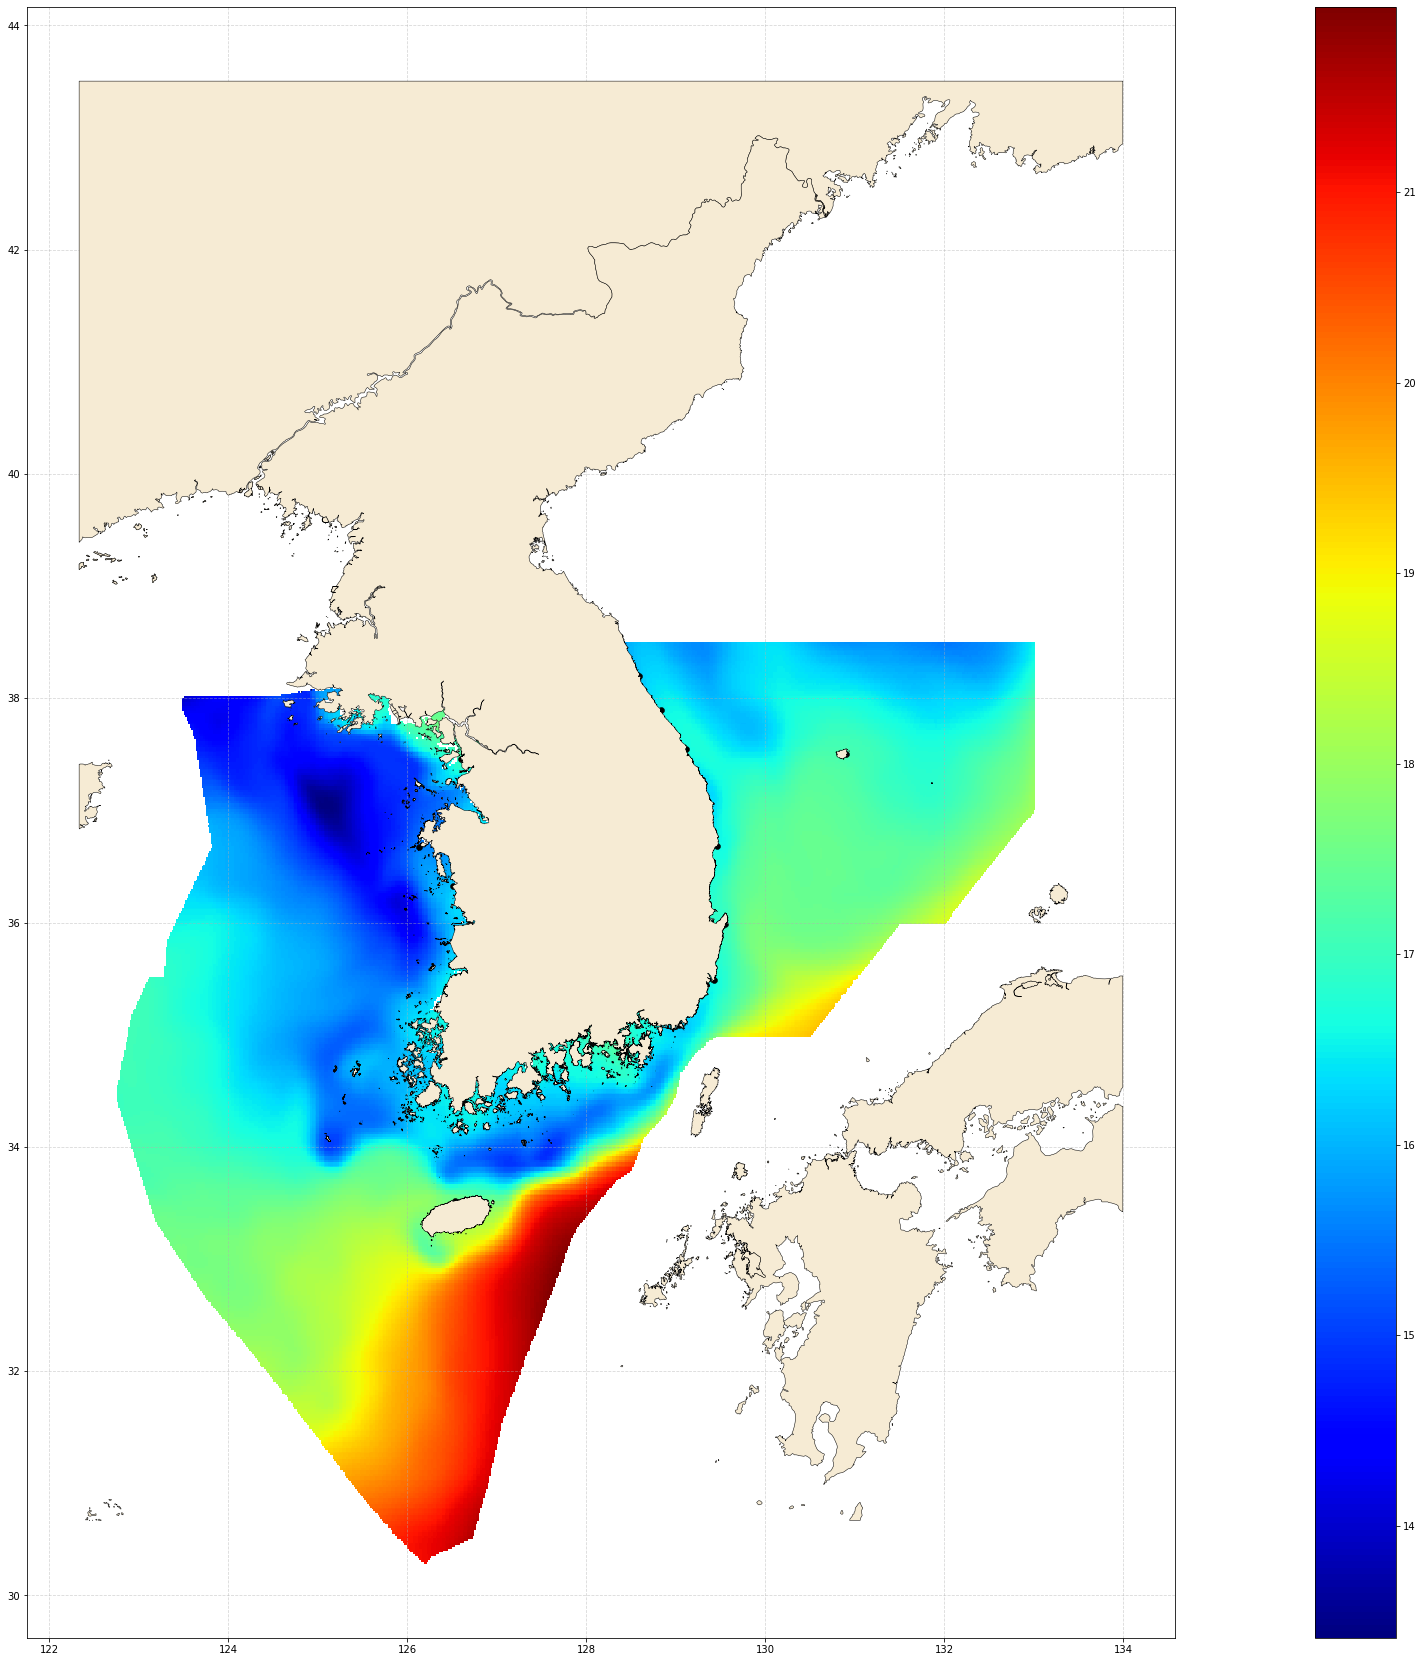

In [26]:
for fname in flist:
    data = gpd.read_file(fname, encoding='utf8') 
    plot_colormap(data,  '2017_2019_', 10, info_shp)

In [9]:
data

,LAYER,ELEVATION,MIN1,SA1,MIN3,SA3,AVG_ELEV_M,MODE_ELE_M,STD_DEV__M,2017_2019_,geometry
0,Unknown Area Type,-68.000,GR9_F3G24_U1,1,GR3_F3G24_U,1,-67.923,-67.9,0.052579,17.021,"POLYGON Z ((122.75000 34.55000 -68.00000, 122...."
1,Unknown Area Type,-68.000,GR9_F3G24_U4,1,GR3_F3G24_U,1,-67.997,-68.0,0.010843,17.017,"POLYGON Z ((122.75000 34.53333 -68.00000, 122...."
2,Unknown Area Type,-68.000,GR9_F3G24_U7,1,GR3_F3G24_U,1,-68.000,-68.0,0.000000,17.010,"POLYGON Z ((122.75000 34.51667 -68.00000, 122...."
3,Unknown Area Type,-68.000,GR9_F3G42_A1,1,GR3_F3G42_A,1,-68.000,-68.0,0.000000,17.010,"POLYGON Z ((122.75000 34.50000 -68.00000, 122...."
4,Unknown Area Type,-68.000,GR9_F3G42_A4,1,GR3_F3G42_A,1,-68.000,-68.0,0.000000,17.007,"POLYGON Z ((122.75000 34.48333 -68.00000, 122...."
...,...,...,...,...,...,...,...,...,...,...,...
132910,Unknown Area Type,-313.030,GR9_G2J33_P4,1,GR3_G2J33_P,1,-310.483,-313.0,1.702060,18.031,"POLYGON Z ((133.00000 37.08333 -313.03000, 133..."
132911,Unknown Area Type,-307.595,GR9_G2J33_P7,1,GR3_G2J33_P,1,-306.293,-306.9,0.601267,18.054,"POLYGON Z ((133.00000 37.06667 -307.59500, 133..."
132912,Unknown Area Type,-305.275,GR9_G2J33_U1,1,GR3_G2J33_U,1,-304.056,-305.0,0.819346,18.054,"POLYGON Z ((133.00000 37.05000 -305.27499, 133..."
132913,Unknown Area Type,-302.528,GR9_G2J33_U4,1,GR3_G2J33_U,1,-301.188,-302.1,0.861842,18.073,"POLYGON Z ((133.00000 37.03333 -302.52802, 133..."


In [28]:
info_shp.to_file("어업정보통신국.shp", encoding='euckr')